# 2D visualization example

* [The widgets can be seen at mybinder.org by clicking here](https://mybinder.org/v2/gh/tlinnet/mybinder_relax/master?filepath=nmrglue_s4_2d_plotting.ipynb)

## Introduction
This example is taken from Listing S4 from the 2013 JBNMR nmrglue paper. In this example a 2D SSNMR spectrum is visualized. 

* [Link to origin here.](https://github.com/jjhelmus/nmrglue/tree/master/examples/jbnmr_examples/s4_2d_plotting)
* [Modified with inspiration from here](https://github.com/jjhelmus/nmrglue/blob/master/examples/interactive/interactive_2d/2d_interactive.py)

## Get data

In [1]:
# Get data
import os, os.path
ng_dir = 'nmrglue_data/s4_2d_plotting'
if not os.path.exists(ng_dir):
    print("No %s. Downloading."%ng_dir)
    import urllib.request, zipfile
    zipf = 'jbnmr_s4_2d_plotting.zip'
    urllib.request.urlretrieve('https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/nmrglue/%s'%zipf, zipf)
    with zipfile.ZipFile(zipf,"r") as zip_ref:
        zip_ref.extractall("nmrglue_data")
    os.remove(zipf)

## Import packages

In [2]:
import numpy as np
import nmrglue as ng
import pandas as pd
# Plotting. Set backend. This must be done before importing.
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm

## Read data

In [3]:
# Specify data
ng_ft2 = 'nmrglue_data/s4_2d_plotting/test.ft2'

# read in data
ng_dic, ng_data = ng.pipe.read(ng_ft2)

# find PPM limits along each axis
uc_15n = ng.pipe.make_uc(ng_dic, ng_data, 0) # m, rows
uc_13c = ng.pipe.make_uc(ng_dic, ng_data, 1) # n, columns
x0, x1 = uc_13c.ppm_limits()
y0, y1 = uc_15n.ppm_limits()

# Print data size
print("x0,x1: %s,%s"% (x0, x1) )
print("y0,y1: %s,%s"% (y0, y1) )
dim = ng_data.shape
print("ng_data has dim: %s,%s"% (dim[0], dim[1]) )
print("Number of points: %s"% (ng_data.size) )
print("Number of datapoints in the x-axis/columns: %s"%len(ng_data[0]))

x0,x1: 373.44005671816467,-24.31549673312111
y0,y1: 169.08728515307106,70.41490497639201
ng_data has dim: 2048,8192
Number of points: 16777216
Number of datapoints in the x-axis/columns: 8192


## With matplotlib

In [4]:
def plot_matplotlib(ng_data=None, plot_full = True):
    cmap = matplotlib.cm.Blues_r    # contour map (colors to use for contours)
    contour_start =  8.5e4          # contour level start value
    contour_num = 20                # number of contour levels
    contour_factor = 1.20           # scaling factor between contour levels
    # calculate contour levels
    cl = [contour_start * contour_factor ** x for x in range(contour_num)]

    # plot the spectrum
    #fig = plt.figure(figsize=(10, 10))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if plot_full:
        ax.contour(ng_data, cl, colors='blue', extent=(x0, x1, y0, y1), linewidths=0.5)
        # add 1D slices
        x = uc_13c.ppm_scale()
        s1 = ng_data[uc_15n("105.52ppm"), :]
        s2 = ng_data[uc_15n("115.85ppm"), :]
        s3 = ng_data[uc_15n("130.07ppm"), :]
        ax.plot(x, -s1 / 8e4 + 105.52, 'k-')
        ax.plot(x, -s2 / 8e4 + 115.85, 'k-')
        ax.plot(x, -s3 / 8e4 + 130.07, 'k-')

    else:
        x0_2 = 183.5
        x1_2 = 167.5
        y0_2 = 139.5
        y1_2 = 95.5
        x0_2_point = uc_13c("%sppm"%x0_2)
        x1_2_point = uc_13c("%sppm"%x1_2)
        y0_2_point = uc_15n("%sppm"%y0_2)
        y1_2_point = uc_15n("%sppm"%y1_2)
        print(y0_2_point,y1_2_point, x0_2_point,x1_2_point)
        # Extract data
        ng_data_lim = ng_data[y0_2_point:y1_2_point, x0_2_point:x1_2_point]
        # Plot
        ax.contour(ng_data_lim, cl, colors='blue', extent=(x0_2, x1_2, y0_2, y1_2), linewidths=0.5)

        # add 1D slices
        x = uc_13c.ppm_scale()[x0_2_point:x1_2_point]
        s1 = ng_data[uc_15n("105.52ppm"), :][x0_2_point:x1_2_point]
        s2 = ng_data[uc_15n("115.85ppm"), :][x0_2_point:x1_2_point]
        s3 = ng_data[uc_15n("130.07ppm"), :][x0_2_point:x1_2_point]
        
        ax.plot(x, -s1 / 8e4 + 105.52, 'k-')
        ax.plot(x, -s2 / 8e4 + 115.85, 'k-')
        ax.plot(x, -s3 / 8e4 + 130.07, 'k-')

    ax.set_xlabel("13C ppm", size=20)
    ax.set_ylabel("15N ppm", size=20)
    # label the axis and save
    ax.set_xlim(183.5, 167.5)
    ax.set_ylim(139.5, 95.5)
    
    return fig

In [5]:
%%time
#fig = plot_matplotlib(ng_data=ng_data, plot_full=True)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.4 µs


<IPython.core.display.Javascript object>


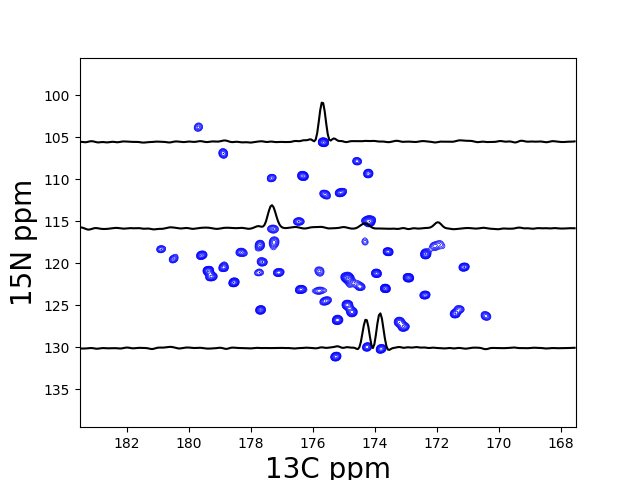

614 1527 3911 4241
CPU times: user 450 ms, sys: 20 ms, total: 470 ms
Wall time: 467 ms


In [6]:
%%time
fig = plot_matplotlib(ng_data=ng_data, plot_full=False)

# Data function

In [52]:
def get_data(ng_data=None):
    x0_2 = 183.5
    x1_2 = 167.5
    y0_2 = 139.5
    y1_2 = 95.5
    x0_2_point = uc_13c("%sppm"%x0_2)
    x1_2_point = uc_13c("%sppm"%x1_2)
    y0_2_point = uc_15n("%sppm"%y0_2)
    y1_2_point = uc_15n("%sppm"%y1_2)
    #print(y0_2_point,y1_2_point, x0_2_point,x1_2_point)
    # Extract data
    ng_data_lim = ng_data[y0_2_point:y1_2_point, x0_2_point:x1_2_point]

    # Make mask
    mask = ng_data_lim < np.percentile(ng_data_lim, 95.)
    # Copy and replace
    ng_data_plot = np.copy(ng_data_lim)
    ng_data_plot[mask] = np.nan
    #print("Number of masked:", np.sum(mask))
    #print("Number of remaining:",np.count_nonzero(~np.isnan(ng_data_plot)))
    #ng_data_lim = ng_data_plot

    # Unpack numpy data to pandas
    df = pd.DataFrame(np.column_stack(list(map(np.ravel, np.meshgrid(*map(np.arange, ng_data_lim.shape), indexing="ij"))) + [ng_data_lim.ravel()]),
                   columns=["i", "j", "int"])
    # Replace with points
    df['di'] = df['i']+y0_2_point
    df['dj'] = df['j']+x0_2_point
    # Convert to integers
    df[['i','j','di','dj']] = df[['i','j','di','dj']].astype(int)

    # Calculate ppm range
    x_ppm = uc_13c.ppm_scale()[x0_2_point:x1_2_point]
    y_ppm = uc_13c.ppm_scale()[y0_2_point:y1_2_point]

    # In ppm
    x_range = x0_2, x1_2
    y_range = y0_2, y1_2
    # In points
    x_range_point = x0_2_point, x1_2_point
    y_range_point = y0_2_point, y1_2_point
    
    return ng_data_lim, df, x_range, y_range, x_range_point, y_range_point

In [53]:
ng_data_lim, df, x_range, y_range, x_range_point, y_range_point = get_data(ng_data=ng_data)

In [57]:
x_ppm = uc_13c.ppm_scale()[x_range_point[0]:x_range_point[1]]
y_ppm = uc_13c.ppm_scale()[y_range_point[0]:y_range_point[1]]

## With bokeh

* [From here](https://github.com/bokeh/datashader/blob/master/examples/getting_started/2-Pipeline.ipynb)

In [58]:
import bokeh.plotting as bplt
from bokeh.io import output_notebook
output_notebook() 

Loading BokehJS ...

In [59]:
def plot_bokeh(ng_data=None):
    ng_data_lim, df, x_range, y_range, x_range_point, y_range_point = get_data(ng_data=ng_data)
    
    fig = bplt.figure(x_range=x_range, y_range=y_range)
    dw=np.abs(x_range[0] - x_range[1])
    dh=np.abs(y_range[0] - y_range[1])
    fig.image(image=[ng_data_lim], x=x_range[0], y=y_range[0], dw=dw, dh=dh, palette="Spectral11")
    
    return fig

In [60]:
%%time
fig = plot_bokeh(ng_data=ng_data)
bplt.show(fig)

CPU times: user 220 ms, sys: 10 ms, total: 230 ms
Wall time: 233 ms


## With plotly

In [61]:
import plotly.graph_objs as go
p_online = False
if p_online:
    import plotly.plotly as py
    # Set credential
    import plotly.tools
    plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
else:
    import plotly.offline as py
    py.init_notebook_mode(connected=True)

In [62]:
def plot_plotly(ng_data=None):
    ng_data_lim, df, x_range, y_range, x_range_point, y_range_point = get_data(ng_data=ng_data)
    
    data = [go.Contour(z=ng_data_lim, colorscale='Jet', contours=dict( coloring='lines') ) ]
    layout = go.Layout( )
    fig = go.Figure(data=data, layout=layout)
    return fig

In [63]:
%%time
#fig = plot_plotly(ng_data=ng_data)
#py.iplot(fig)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


# With datashader

* [From here](http://datashader.readthedocs.io/en/latest/)

In [64]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage
from colorcet import fire

In [65]:
def plot_ds(ng_data=None):
    ng_data_lim, df, x_range, y_range, x_range_point, y_range_point = get_data(ng_data=ng_data)

    # Make canvas
    cvs = ds.Canvas(plot_width=400, plot_height=400, x_range=x_range_point, y_range=y_range_point)
    # Shift i, j
    agg = cvs.points(df, 'dj', 'di', ds.mean('int'))
    # Make fig
    img = tf.set_background(tf.shade(agg, cmap=fire, how='linear'), "black")
    #img = tf.set_background(tf.shade(agg, cmap=["white", 'darkblue'], how='linear'), "white")
    fig = tf.Images(img)
    return fig

CPU times: user 110 ms, sys: 10 ms, total: 120 ms
Wall time: 117 ms


""

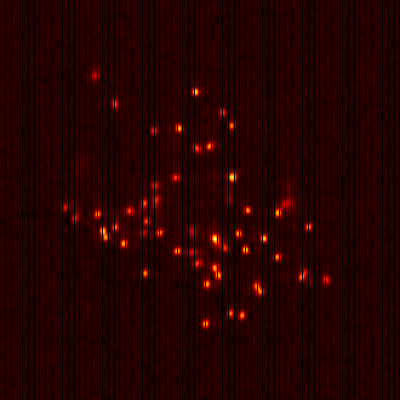

In [66]:
%time fig = plot_ds(ng_data=ng_data)
fig

### Combine

* [From here:](https://github.com/bokeh/datashader/blob/master/examples/getting_started/3-Interactivity.ipynb)

In [69]:
def image_callback(x_range, y_range, w, h, name=None):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'dj', 'di', ds.mean('int'))
    img = tf.set_background(tf.shade(agg, cmap=fire, how='linear'), "black")
    return tf.dynspread(img, threshold=0.5)

# Get df and lim of data
ng_data_lim, df, x_range, y_range, x_range_point, y_range_point = get_data(ng_data=ng_data)

p = bplt.figure(tools='pan,wheel_zoom,reset', 
                x_range=x_range_point, y_range=y_range_point, 
                plot_width=500, plot_height=500)

InteractiveImage(p, image_callback)